# Семинар 1. Введение 🐈‍

## О курсе
- 1 лекция, 1 семинар в неделю
- Экзамен
- Для допуска к экзамену необходимо сдать задания. Их выложим чуть позже
- Сдача заданий будет проходить онлайн (в Discord), нужно согласовать время
- На семинарах разбираем примеры, код, задаем вопросы
- __Семинары прошлых лет доступны [по ссылке](https://github.com/ENOT-AutoDL/deep-learning-seminars)__


Курс имеет практическую ориентированость в применении нейронных сетей в компьютерном зрении и обработке последовательностей. 

В курсе будут рассмотрены:
* основные архитектуры нейронных сетей
* устройство нейронных сетей (свертки, рекуррентные слои и т.д.)
* обучение нейронных сетей
* приложения в компьютерном зрении. Например, можно обучить нейросеть решать одну из задач:
  - детектировать на картинке пёселей (выдавать бокс с их координатами)
  - классифицировать, собачка или кошечка изображены на картинке (классификация)
  - выдавать координаты носа собачки (чтобы знать, куда делать тык - регрессия)
  - сегментировать изображение (в результате получим маску, в которой каждый пиксель с кошечкой будет обозначен черным цветом, а остальные пиксели - белым)

![](images/0.jpg)

* приложения в NLP (языковые модели), к таким задачам относятся:
  - перевод с языка на другой язык
  - генерация текста
  - speech2text
  - text2speech
* обучение с подкреплением (наверное). Пример: алгоритмы для игры в го, self-driving cars и т.д.

__Курс прикладной, будет много практики и совсем не много математики__

# Сегодня на занятии:
- Обсуждаем базовые понятия:
  - метрика
  - функция потерь
  - переобучение
  - обучение с учителем
  - обучение без учителя
  - обучение с подкреплением
- Линейная регрессия - пример на реальной задаче:
  - выбираем переменные, которые будем использовать в качестве независимых фичей, чтобы предсказывать зависимую переменную;
  - связь линейной регрессии с методом наименьших квадратов, аналитическое решение
  - решение методом градиентного спуска и что такое вообще градиентный спуск

# Обсуждаем базовые понятия

## Обучение с учителем, без учителя, с подкреплением

- Обучение с учителем (supervised learning)
  - Есть размеченные данные, которые делятся на часть для обучения (`train`) и для валидации (`val`)
  - Разметка производится человеком или алгоритмом
  - Учимся на тренировочных данных
  - Модель выучивает общие закономерности, и замеряется ее метрика на новых данных
  - Пример: линейная регрессия, логистическая регрессия, классификация изображений, дерево решений

- Обучение без учителя (unsupervised learning)
  - Находятся скрытые закономерности в данных
  - Датасет не размечен (нет лейблов)
  - Пример: кластеризация данных, ассоциация (рекомендательные системы)

- Обучение с подкреплением:
  - Агент взаимодействует со средой и получает от нее отклик, который поощряет желаемое поведение

## Метрика и функция потерь (лосс)

* __Метрика качества (метрика)__ -  функция, которая показывает, насколько сильно полученные предсказания, выдаваемые моделью, похожи на правильные ответы. Выбирается из соображений целесообразности (от бизнеса), а не из-за её совместимости с какими-то моделями (Может быть недифференцируемой).

* __Функция потерь__ - прокси-метрика, в процессе оптимизации которой улучшается и исходная метрика. Используется при поиске оптимальной модели при помощи градиентного спуска. (Нужна дифференцируемая)

* __Обобщающая способность модели__ - способность модели выучить закономерности не только на обучающем датасете, но и давать адекватные результаты на новых данных.

* __Переобученный алгоритм__ - алгоритм, избыточно подстроившийся под данные. С увеличением сложности модели ошибка на обучающей выборке падает, при этом ошибка на тестовых данных может расти.

В каждой модели у нас есть обучаемые (настраиваемые) параметры (веса в нейронной сети, коэффициенты в линейных моделях), которые мы будем оптимизировать в ходе обучения.

## Градиентный спуск

Идея в том, что у нас есть функция потерь, которую мы хотим минимизировать. Градиент функции потерь по параметрам (весам) показывает направление роста функции потерь. Если обновлять веса, двигаясь в сторону, противоположную градиенту, то мы будем минимизировать эту функцию.

$
    x^i = x^{i-1} - \alpha * \nabla L(x^{i-1})
$ 

![](images/1.png)

*Градиентный спуск. Так может выглядеть гиперповерхность в пространстве параметров*

![](images/2.png)

*Процесс градиентного спуска (одномерный пример)*

$\alpha$ - learning rate, очень важный параметр, который мы выбираем сами, руководствуясь здравым смыслом и опытом. От выбора learning rate зависит то, обучится вообще модель или нет.

![](images/4.png)

*Обучение с разными learning rate*

## Переобучение (наглядный пример). Зачем делить на train/test/val?

Так выглядит переобучение:

![](images/3.png)

*Модель переобучена - она описывает выбросы, которые можно объяснить шумом и которые не повторятся в других данных*

- На `train` только тренируемся
- Мы градиентным спуском "подкручиваем" веса так, чтобы метрика на `train` была высокой. Поэтому, если что-то не пошло сильно не так, она всегда будет на `train` достаточно хорошей, и это об обобщающей способности модели не будет ничего говорить
- Нужно валидироваться (мерить метрику) на другой подвыборке (на `val`)
- Уже по валидации можно судить, натренировалась и не перетренировалась ли модель
- В самом конце, когда уже прекратили обучение, по-хорошему надо еще раз померить метрику на `test`. А то вдруг мы переобучились под `val`

# Пример с линейной регрессией. Начало

Мы хотим построить модель, которая бы предсказывала нам значение зависимой переменной от независимых. Что может быть проще линейной модели?

Давайте попробуем построить модель, которая будет предсказывать цену дома по его характеристикам. Только сначала убедимся, что это вообще хорошая идея и предположение линейности соблюдается:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

mpl.rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

Наши данные - датасет [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) с kaggle

In [5]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

--2023-02-13 19:12:13--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv’

house_prices_train. 100%[===================>] 449.88K  1.26MB/s    in 0.3s    

2023-02-13 19:12:14 (1.26 MB/s) - ‘house_prices_train.csv’ saved [460676/460676]



In [7]:
df_train = pd.read_csv('house_prices_train.csv')

Посмотрим на датасет:

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/tmp/ipykernel_3400812/2818368565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice']);


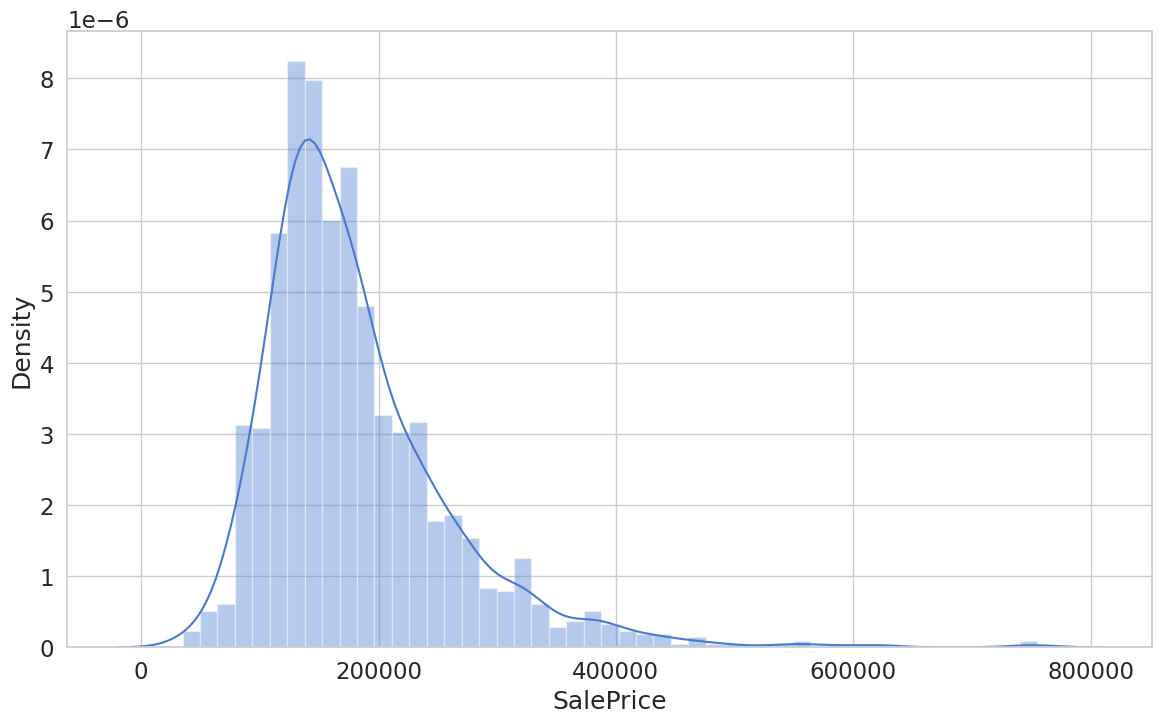

In [9]:
sns.distplot(df_train['SalePrice']);

В датасете 80 фич (независимых переменных, которые каким-то образом могут влиять на зависимую). Мы будем использовать лишь несколько самых важных

In [16]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Посмотрим, как влияет площадь на цену:

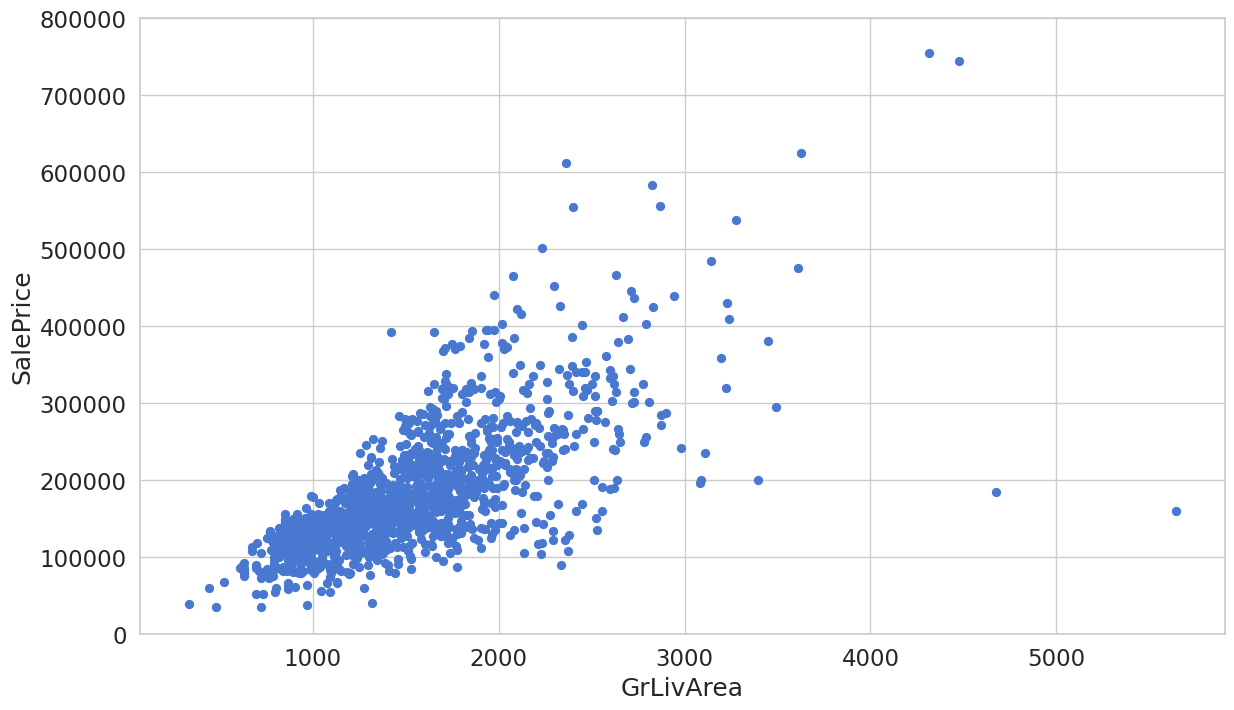

In [17]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

Посмотрим на корреляцию фич с зависимой величиной (не у всех, а у 8 самых скоррелированных).
Корреляция равна нулю у независимых величин (но равенство нулю не означает независимость) и равна по модулю единице, если величины линейно связаны

/tmp/ipykernel_3400812/231085671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


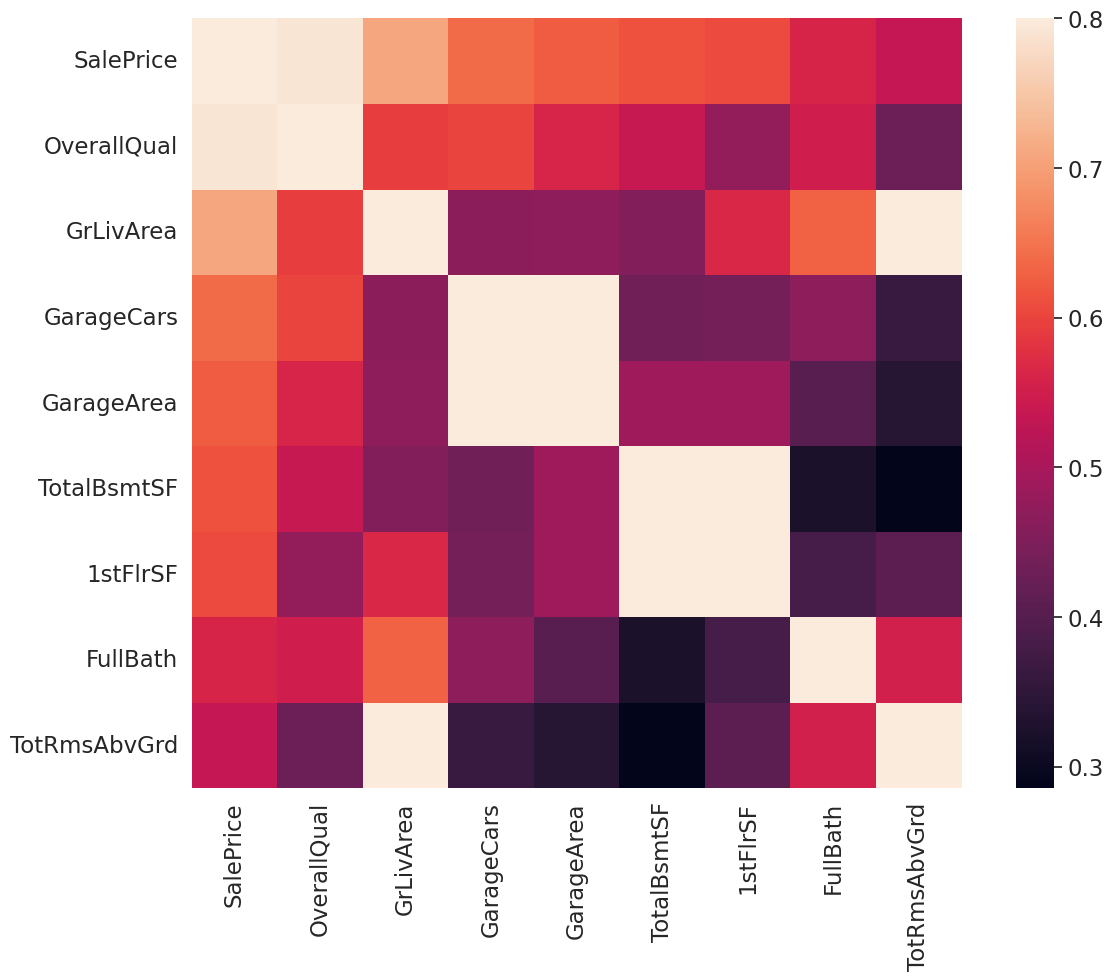

In [18]:
k = 9 # number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

Какие фичи у нас вышли:
- `OverallQual` - качество стройматериалов
- `GrLivArea` - площадь постройки (кроме первого этажа)
- `GarageCars` - размер гаража (по вместимости машин)
- `GarageArea` - разер гаража (площадь)
- `TotalBsmtSF` - площадь подвала
- `1stFlrSF` - площадь первого этажа
- `FullBath` - число полноценных ванн выше первого этажа
- `TotRmsAbvGrd` - число комнат выше первого этажа

Скорее всего, `GarageCars` и `GarageArea` - это взаимозаменяемые переменные и достаточно одной из них

Одна из самых малоскоррелированных с ценой дома фичей на графике сверху - это `TotalBsmtSF` (площадь подвала), для неё картинка тоже довольно линейная:

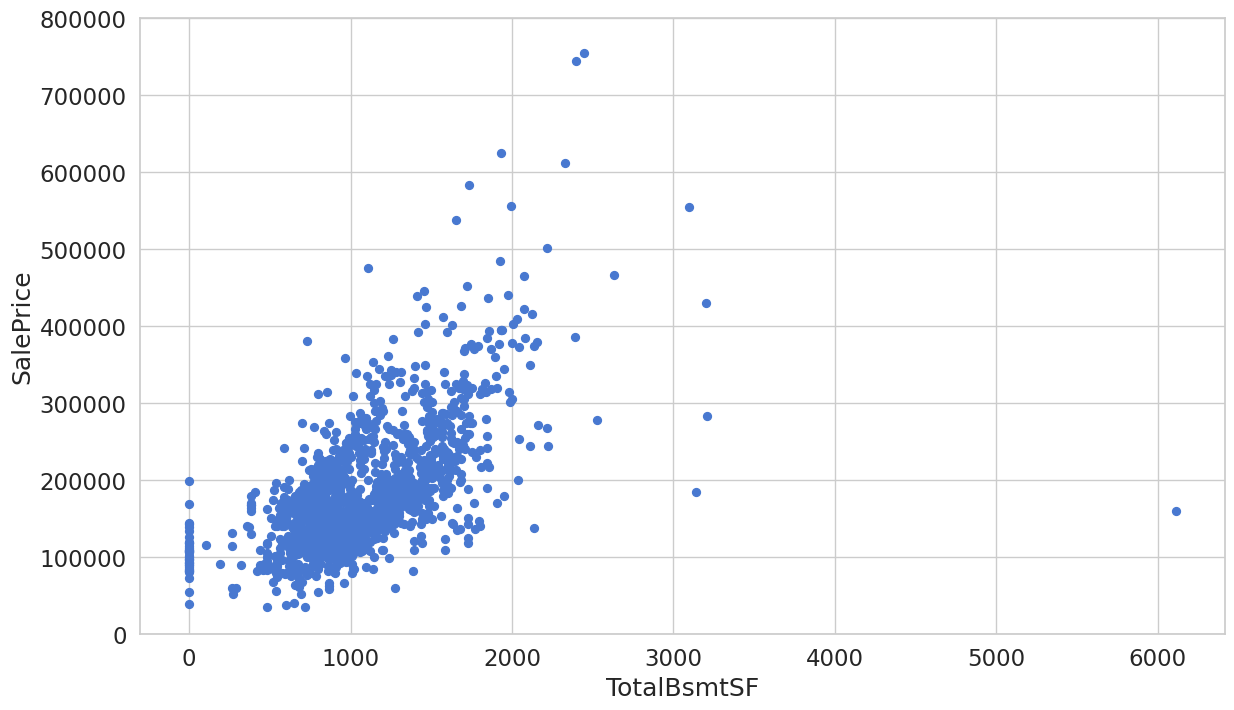

In [19]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4, diag_kind='kde');

/home/savchenko/miniconda3/envs/dl_seminars/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


### Препроцессинг данных

Смотрим, сколько у нас строчек в датасете с незаполненной информацией (`null`) - в дальнейшем мы их просто удалим

In [21]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Отнормируем наши фичи:

$$x'= \frac{x - \mu}{\sigma}$$

где $\mu$ - это среднее, а $\sigma$ - это стандартное отклонение

Зачем нормируем?
- Для более быстрой сходимости при использовании SGD
- Скорее дополнительный плюс: когда фичи нормированы, то коэффициенты перед ними в линейной регрессии легко сравнивать между собой и интерпретировать

In [22]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [23]:
x.shape

(1460, 2)

# Линейная регрессия. Немного теории

![](https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg)

- Используется, когда предсказываемая величина является непрерывной (цена и т.д.)
- Бывает простой случай (когда независимая переменная одна) или сложный (независимых переменных много, множественная регрессия):

$$ Y(x_1,x_2,x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0$$

$x_1, x_2, x_3$ - это фичи. Их удобно записать в виде столбца шейпа $[1, N_f]$ (для одного примера)

Для того, чтобы не таскать сдвиг (коэффициент $w_0$), можно добавить в столбец фичей еще один элемент - единичку:

$$ Y(x_1,x_2,x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0 1$$

Наша задача - найти коэффициенты $w_i$. А как мы будем оценивать качество полученной модели?

Наша метрика - это $MSE$:

$$ MSE = J(W) =  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2 $$

где $h_w(x^{(i)})$ - это предсказание модели, а $y^{(i)}$ - это истинное значение предсказываемой величины.

С помощью $MSE$ можем оценить качество модели. А поскольку эта метрика еще и дифференцируема, то ее можно использовать в качестве функции потерь в комбинации с градиентным спуском. Ее производная по $h_w(x^{(i)})$:

$$MSE' = J'(W) = \frac{2}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$

$$h_w(x^{(i)}) = \sum_j w_j x^i_j = W^T x^i$$ $i$ - индекс примера в датасете, $j$ - индекс фичи, $W$ и $x$ - векторы-столбцы

Чем лучше модель, тем меньше должно быть значение $MSE$ - нашей функции потерь.

Получается, у нас есть два метода решения задачи:
- аналитическое решение - взять производную от $J(W)$ по всем $w_i$ и найти минимум (метод наименьших квадратов)
- воспользоваться градиентным спуском

Сначала разберем решение методом градиентного спуска

## Метод градиентного спуска

- Не всегда аналитическое решение можно найти, как в данном случае
- Хорошо бы убедиться, что оба метода дают один и тот же ответ

### Попробуем воспользоваться градиентным спуском, когда единственная независимая переменная - это площадь

In [26]:
def loss(h, y):
    sq_error = (h - y)**2
    n = len(y)
    return 1.0 / n * sq_error.sum()

In [27]:
class LinearRegression:
  
    def predict(self, X):
        return np.dot(X, self._W)
  
    def _gradient_descent_step(self, X, targets, lr):
        predictions = self.predict(X)   
        error = predictions - targets
        gradient = 2 * np.dot(X.T,  error) / len(X)
        self._W -= lr * gradient
      
    def fit(self, X, y, n_iter=100000, lr=0.01):
        self._W = np.zeros(X.shape[1])
        self._cost_history = []
        self._w_history = [self._W]
    
        for i in range(n_iter):
            prediction = self.predict(X)
            cost = loss(prediction, y)

            self._cost_history.append(cost)
            self._gradient_descent_step(x, y, lr)
            self._w_history.append(self._W.copy())
        
        return self

In [28]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [29]:
clf._W

array([180921.19589041,  56294.90210563])

In [30]:
clf._cost_history[-1] / 10**6

3139.8432096665274

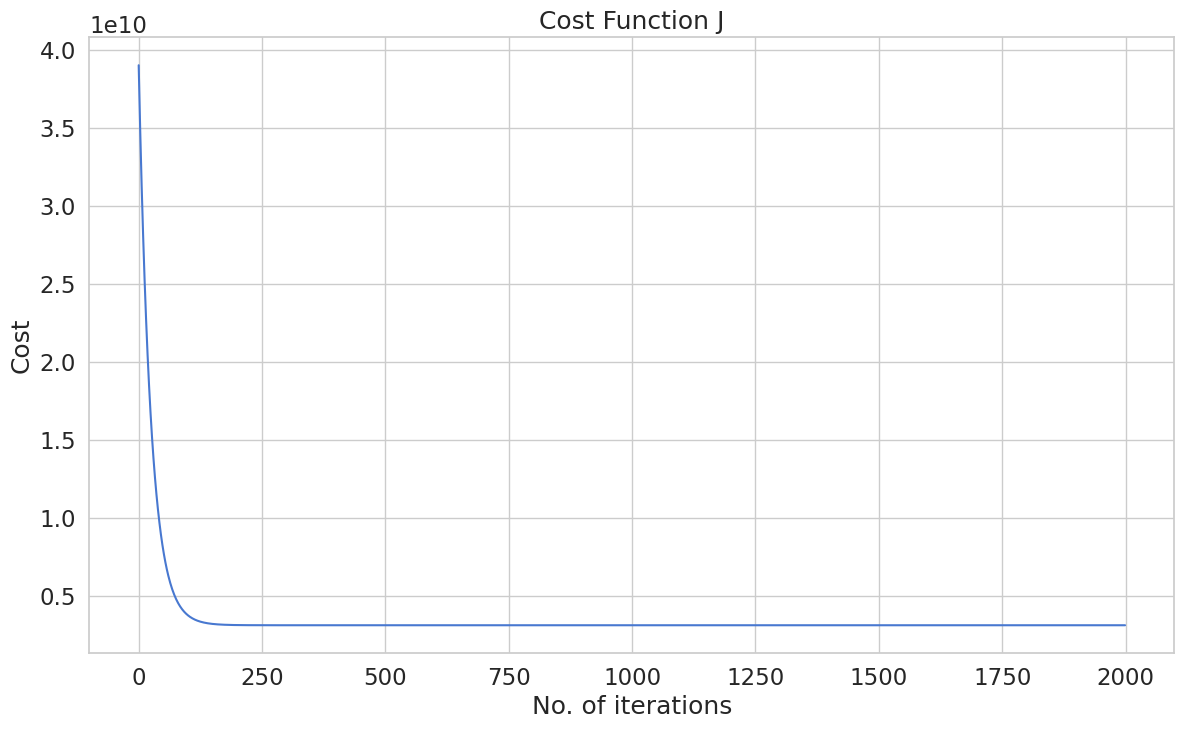

In [31]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

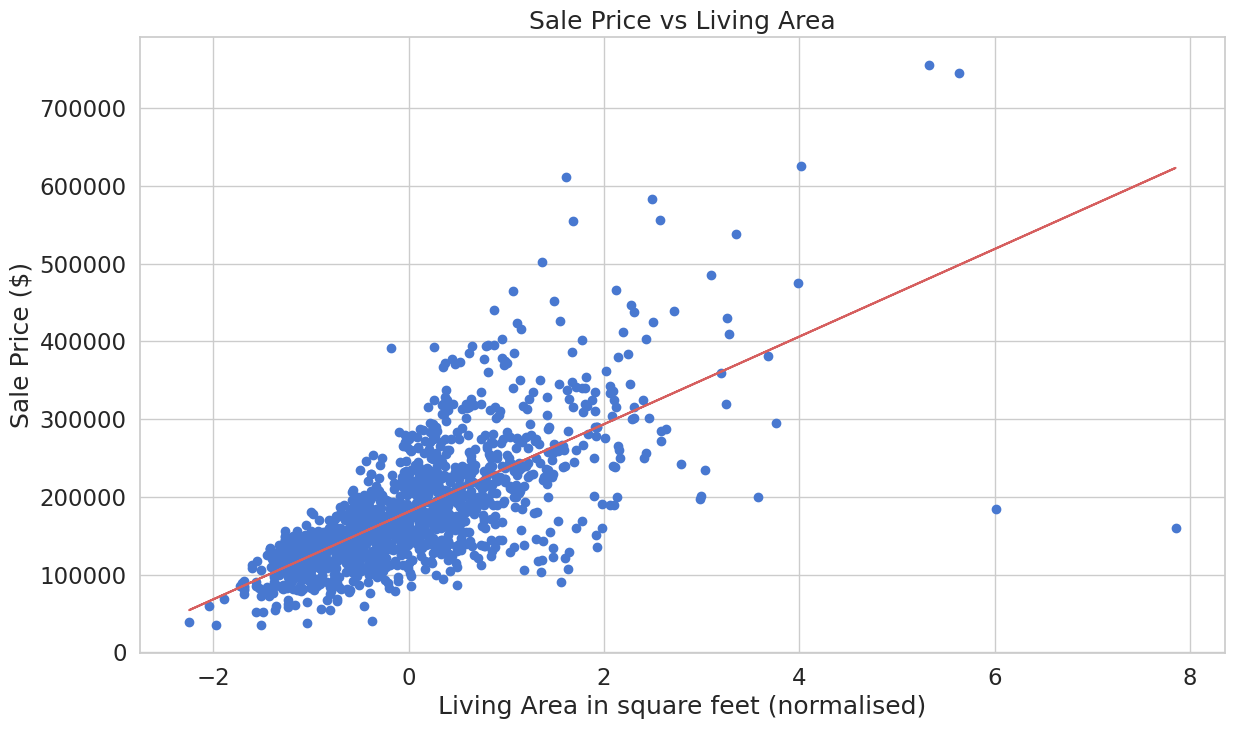

In [ ]:
#Set the plot up
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y)

y_pred = np.dot(x, clf._W)
plt.plot(x[:,1], y_pred, color='r')

### Решение готово! А теперь добавим еще независимую переменную и посмотрим, улучшит ли это нашу бейзлайновую модель

In [33]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [34]:
clf._W

array([180921.19589041,  37485.87521903,  26628.3068807 ,  15917.03541542])

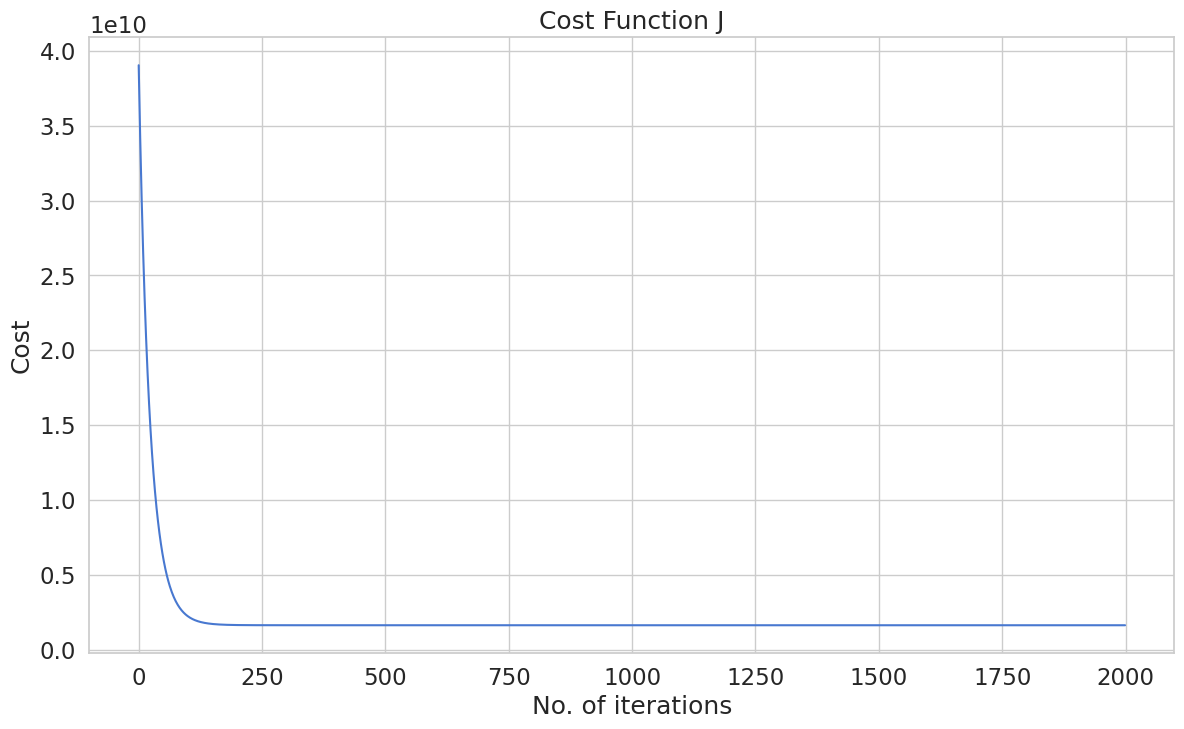

In [35]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [36]:
clf._cost_history[-1] / 10**6

1645.6340555317768

## Метод наименьших квадратов

Мы можем переписать $J(W)$, $x$ и $y$ не в терминах столбцов, а как матрицы и получить матричное уравнение:

$$J(W, X, y) = (XW - y)^T (XW - y)$$

Опустим математические выкладки, запишем сразу:

$$\nabla_W J = 2 (X^TXW - X^Ty)$$

Чтобы минимизировать $J$, приравниваем производную к нулю:

$$X^TXW = X^Ty$$

$$W = (X^TX)^{-1}X^Ty$$

In [37]:
x.shape, y.shape

((1460, 4), (1460,))

Коэффициенты в линейной регрессии, найденные при помощи аналитического решения:

In [38]:
np.linalg.inv(x.T @ x) @ x.T @ y

array([180921.19589041,  37485.88071866,  26628.30404534,  15917.03233404])

Сравним с коэффициентами, полученными градиентным спуском:

In [39]:
clf._W

array([180921.19589041,  37485.87521903,  26628.3068807 ,  15917.03541542])

## Линейная регрессия. Продолжение

- Почему использовать линейную регрессию - это вообще ок?
- Почему выбирать $MSE$ в качестве функции потерь - это хорошая практика?

Пусть

$$ y^{(i)} = W^Tx^{(i)} + ϵ^{(i)}$$

$ϵ$ - это случайный шум и влияние от эффектов, не включенных в регрессию (например, мы забыли добавить одну независимую переменную в линейную регрессию). Предположим, что $\epsilon^{(i)} ∼ N(0, \sigma^2)$. Тогда и $ y^{(i)} - W^Tx^{(i)} ∼ N(0, \sigma^2)$

То есть $$p(y^{(i)} | x^{(i)}; W) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y^{(i)}-W^Tx^{(i)})^2)}{2\sigma^2}}$$

В терминах метода максимального правдоподобия $p(y^{(i)} | x^{(i)}; W)$ (вероятность получить даннные, которые у нас есть, при значениях $W$) является функцией правдоподобия $L(W)$

![](https://alexanderdyakonov.files.wordpress.com/2018/03/log_loss_02.png?w=700)